<a href="https://colab.research.google.com/github/renanamd/analise_vinijr/blob/main/analise_vinijr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas statsbombpy mplsoccer matplotlib

In [3]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

In [4]:
match_ids = [3939976, 3939983, 3939991, 3942415]

In [5]:
def get_player_events(match_ids, player_name):
    all_events = []
    for match_id in match_ids:
        events = sb.events(match_id)
        player_events = events[events['player'] == player_name]
        all_events.append(player_events)
    return pd.concat(all_events, ignore_index=True)

player_name = "Vinícius José Paixão de Oliveira Júnior"
vinicius_events = get_player_events(match_ids, player_name)

In [6]:
shots = vinicius_events[vinicius_events['type'] == 'Shot']
passes = vinicius_events[vinicius_events['type'] == 'Pass']
dribbles = vinicius_events[vinicius_events['type'] == 'Dribble']
carries = vinicius_events[vinicius_events['type'] == 'Carry']
crosses = passes[passes['pass_cross'] == True]
fouls_won = vinicius_events[vinicius_events['type'] == 'Foul Won']

In [7]:
total_shots = len(shots)
total_xg = shots['shot_statsbomb_xg'].sum()

print(total_shots)
print(total_xg)

4
0.7319247930000001


In [8]:
total_passes = len(passes)
print(total_passes)


69


In [9]:
total_dribbles = len(dribbles)
successful_dribbles = len(dribbles[dribbles['dribble_outcome'] == 'Complete'])

In [10]:
total_crosses = len(crosses)

total_fouls_won = len(fouls_won)

['Goal' 'Off T']


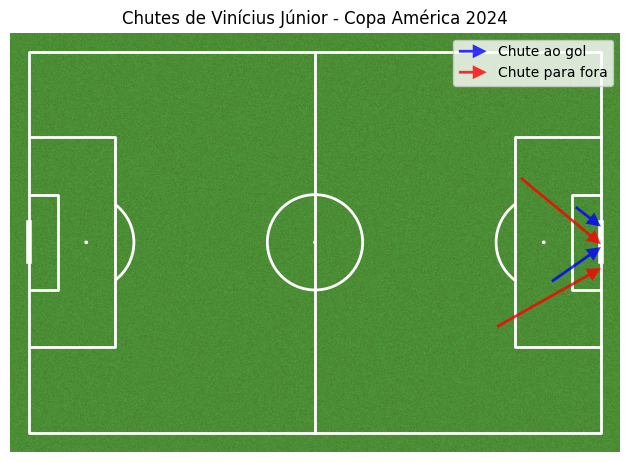

In [25]:
print(shots['shot_outcome'].unique())

# Separar os chutes no gol
shots_on_target = shots[shots['shot_outcome'] == 'Goal']  # ou 'On Target', dependendo do dataset
# Separar os chutes para fora
shots_off_target = shots[shots['shot_outcome'] == 'Off T']  # ou 'Off Target', dependendo do dataset

# Criar o campo de futebol
pitch = Pitch(line_color='white', pitch_color='grass')
fig, ax = pitch.draw()

# Plotar os chutes no gol
pitch.arrows(shots_on_target['location'].apply(lambda x: x[0]),
             shots_on_target['location'].apply(lambda x: x[1]),
             shots_on_target['shot_end_location'].apply(lambda x: x[0] if x is not None else x),
             shots_on_target['shot_end_location'].apply(lambda x: x[1] if x is not None else x),
             alpha=0.8, color='blue', width=2, headwidth=5, headlength=5, headaxislength=5, ax=ax, label='Chute ao gol')

# Plotar os chutes para fora
pitch.arrows(shots_off_target['location'].apply(lambda x: x[0]),
             shots_off_target['location'].apply(lambda x: x[1]),
             shots_off_target['shot_end_location'].apply(lambda x: x[0] if x is not None else x),
             shots_off_target['shot_end_location'].apply(lambda x: x[1] if x is not None else x),
             alpha=0.8, color='red', width=2, headwidth=5, headlength=5, headaxislength=5, ax=ax, label='Chute para fora')

# Adicionar uma legenda para distinguir os tipos de chutes
ax.legend()

# Título do gráfico
plt.title('Chutes de Vinícius Júnior - Copa América 2024')
plt.show()

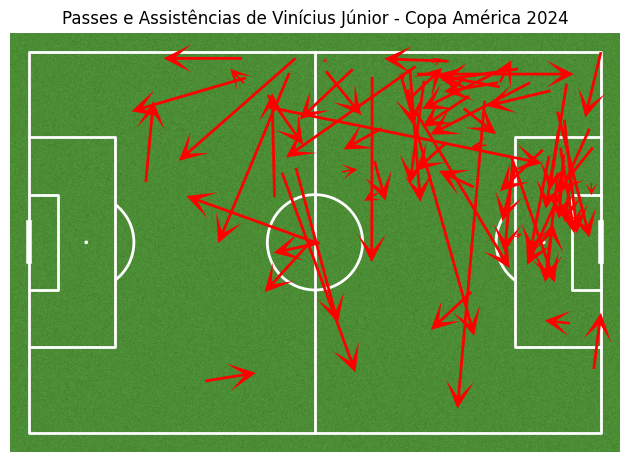

In [12]:
fig, ax = pitch.draw()
pitch.arrows(passes['location'].apply(lambda x: x[0]),
             passes['location'].apply(lambda x: x[1]),
             passes['pass_end_location'].apply(lambda x: x[0]),
             passes['pass_end_location'].apply(lambda x: x[1]),
             width=2, headwidth=10, headlength=10, color='red', ax=ax)
plt.title(f'Passes e Assistências de Vinícius Júnior - Copa América 2024')
plt.show()

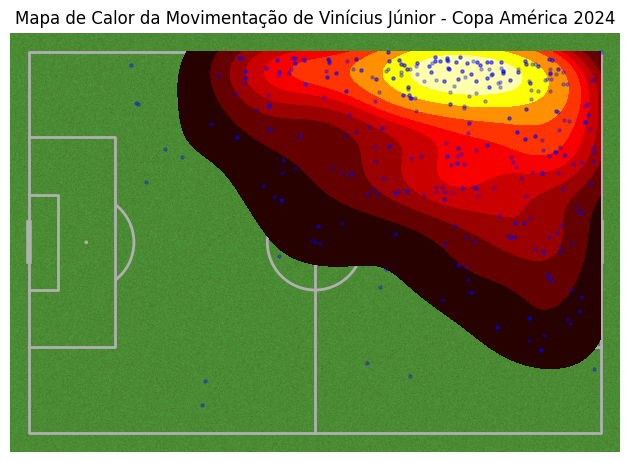

In [13]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você já tenha coletado os eventos do jogador
# E que eles estejam no DataFrame `vinicius_events`

# Filtrar os eventos que têm coordenadas de localização
locations = vinicius_events['location'].dropna().tolist()

# Separar as coordenadas X e Y
x_coords = [loc[0] for loc in locations]
y_coords = [loc[1] for loc in locations]

# Criar o campo de futebol
pitch = Pitch(pitch_color='grass')

# Criar a figura e os eixos
fig, ax = pitch.draw()

# Gerar o mapa de calor usando as coordenadas
bin_statistic = pitch.bin_statistic(x_coords, y_coords, statistic='count', bins=(100, 100))
# Gerar o mapa de densidade usando as coordenadas
density = pitch.kdeplot(x_coords, y_coords, ax=ax, fill=True, cmap='hot', shade_lowest=False)


# Adicionar a densidade de movimentos no campo
pitch.scatter(x_coords, y_coords, alpha=0.3, color='blue', ax=ax, s=5)

# Título do gráfico
plt.title('Mapa de Calor da Movimentação de Vinícius Júnior - Copa América 2024')

# Exibir o gráfico
plt.show()


In [16]:
pd.set_option('display.max_columns', None)

# Exibir todas as colunas
print(vinicius_events.columns)

print(vinicius_events.head().T)

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot',
       ...
       'bad_behaviour_card', 'ball_recovery_offensive', 'clearance_other',
       'foul_committed_penalty', 'miscontrol_aerial_won', 'pass_outswinging',
       'shot_deflected', 'shot_open_goal', 'shot_redirect', 'pass_straight'],
      dtype='object', length=102)
                                  0    1    2    3    4
50_50                           NaN  NaN  NaN  NaN  NaN
ball_receipt_outcome            NaN  NaN  NaN  NaN  NaN
ball_recovery_recovery_failure  NaN  NaN  NaN  NaN  NaN
block_deflection                NaN  NaN  NaN  NaN  NaN
block_offensive                 NaN  NaN  NaN  NaN  NaN
...                             ...  ...  ...  ...  ...
pass_outswinging                NaN  NaN  NaN  NaN  NaN
shot_deflected                  